In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import matplotlib as mpl

from matplotlib.font_manager import FontManager
import matplotlib.patches as patches
import matplotlib.colors as col
from matplotlib import cm
%pylab inline

pd.options.display.max_columns = None

import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Populating the interactive namespace from numpy and matplotlib


In [2]:
results = pd.read_csv('primary_results.csv')
county_facts= pd.read_csv('county_facts.csv')

In [3]:
results.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078


In [4]:
county_facts.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI225214,RHI325214,RHI425214,RHI525214,RHI625214,RHI725214,RHI825214,POP715213,POP645213,POP815213,EDU635213,EDU685213,VET605213,LFE305213,HSG010214,HSG445213,HSG096213,HSG495213,HSD410213,HSD310213,INC910213,INC110213,PVY020213,BZA010213,BZA110213,BZA115213,NES010213,SBO001207,SBO315207,SBO115207,SBO215207,SBO515207,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,50.8,77.4,13.2,1.2,5.4,0.2,2.5,17.4,62.1,84.9,12.9,20.7,86.0,28.8,21263779,25.5,133957180,64.9,26.0,176700,115610216,2.63,28155,53046,15.4,7488353,118266253,2.0,23005620,27092908,7.1,0.9,5.7,0.1,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,51.5,69.7,26.7,0.7,1.3,0.1,1.5,4.1,66.2,85.0,3.5,5.2,83.1,22.6,388865,24.2,2207912,69.7,15.9,122500,1838683,2.55,23680,43253,18.6,97578,1603100,1.1,311578,382350,14.8,0.8,1.8,0.1,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,51.4,77.9,18.7,0.5,1.1,0.1,1.8,2.7,75.6,85.0,1.6,3.5,85.6,20.9,5922,26.2,22751,76.8,8.3,136200,20071,2.71,24571,53682,12.1,817,10120,2.1,2947,4067,15.2,0.0,1.3,0.0,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,51.2,87.1,9.6,0.7,0.9,0.1,1.6,4.6,83.0,82.1,3.6,5.5,89.1,27.7,19346,25.9,107374,72.6,24.4,168600,73283,2.52,26766,50221,13.9,4871,54988,3.7,16508,19035,2.7,0.4,1.0,0.0,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,46.6,50.2,47.6,0.6,0.5,0.2,0.9,4.5,46.6,84.8,2.9,5.0,73.7,13.4,2120,24.6,11799,67.7,10.6,89200,9200,2.66,16829,32911,26.7,464,6611,-5.6,1546,1667,0.0,0.0,0.0,0.0,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


# Filling the blanks in fips column with "na"

In [5]:
results['fips']=results['fips'].fillna(0)
results['fips']=results['fips'].astype('int')

In [6]:
results.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005,Democrat,Bernie Sanders,222,0.078


In [7]:
county_facts['county']=[(county_facts['area_name'].str.split(' County', 1)[x])[0] for x in range(len(county_facts))]

In [8]:
county_facts.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI225214,RHI325214,RHI425214,RHI525214,RHI625214,RHI725214,RHI825214,POP715213,POP645213,POP815213,EDU635213,EDU685213,VET605213,LFE305213,HSG010214,HSG445213,HSG096213,HSG495213,HSD410213,HSD310213,INC910213,INC110213,PVY020213,BZA010213,BZA110213,BZA115213,NES010213,SBO001207,SBO315207,SBO115207,SBO215207,SBO515207,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210,county
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,50.8,77.4,13.2,1.2,5.4,0.2,2.5,17.4,62.1,84.9,12.9,20.7,86.0,28.8,21263779,25.5,133957180,64.9,26.0,176700,115610216,2.63,28155,53046,15.4,7488353,118266253,2.0,23005620,27092908,7.1,0.9,5.7,0.1,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4,United States
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,51.5,69.7,26.7,0.7,1.3,0.1,1.5,4.1,66.2,85.0,3.5,5.2,83.1,22.6,388865,24.2,2207912,69.7,15.9,122500,1838683,2.55,23680,43253,18.6,97578,1603100,1.1,311578,382350,14.8,0.8,1.8,0.1,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4,Alabama
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,51.4,77.9,18.7,0.5,1.1,0.1,1.8,2.7,75.6,85.0,1.6,3.5,85.6,20.9,5922,26.2,22751,76.8,8.3,136200,20071,2.71,24571,53682,12.1,817,10120,2.1,2947,4067,15.2,0.0,1.3,0.0,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8,Autauga
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,51.2,87.1,9.6,0.7,0.9,0.1,1.6,4.6,83.0,82.1,3.6,5.5,89.1,27.7,19346,25.9,107374,72.6,24.4,168600,73283,2.52,26766,50221,13.9,4871,54988,3.7,16508,19035,2.7,0.4,1.0,0.0,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6,Baldwin
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,46.6,50.2,47.6,0.6,0.5,0.2,0.9,4.5,46.6,84.8,2.9,5.0,73.7,13.4,2120,24.6,11799,67.7,10.6,89200,9200,2.66,16829,32911,26.7,464,6611,-5.6,1546,1667,0.0,0.0,0.0,0.0,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0,Barbour


# Since New Hampshire has no fip value in result table so i tried to pull the values from county_fact table.

In [9]:
NH = results[results['state']=='New Hampshire'][['county','fips']]

In [10]:
NH_facts = county_facts[county_facts['state_abbreviation']=='NH'][['county','fips']]

In [11]:
NH = pd.merge(NH,NH_facts,how='left',on='county').set_index(NH.index)

In [12]:
results['fips'][results['state']=='New Hampshire'] =NH['fips_y']

C:\Users\SwaroopKM99\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Ploting to see vote fraction of each candidiate from Republican 

C:\Users\SwaroopKM99\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

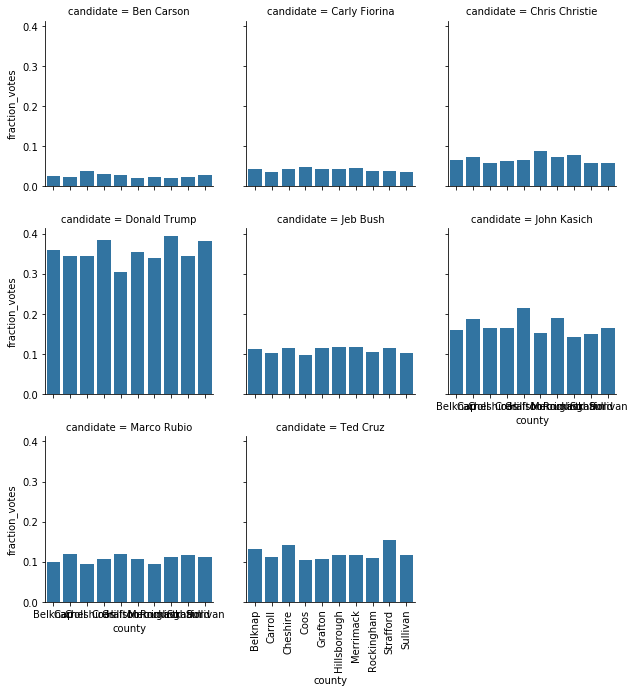

In [13]:
plot = results[results.state == 'New Hampshire']
g = sns.FacetGrid(plot[plot.party == 'Republican'], col = 'candidate', col_wrap = 3)
g.map(sns.barplot, 'county', 'fraction_votes')
plt.xticks(rotation=90)

## Ploting to see vote fraction of each candidiate from Democrat 

C:\Users\SwaroopKM99\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

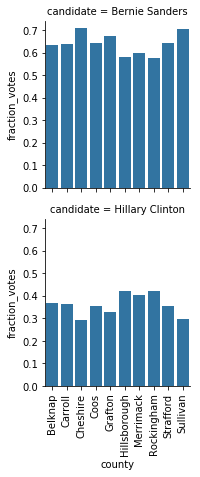

In [14]:
g = sns.FacetGrid(plot[plot.party == 'Democrat'], col = 'candidate', col_wrap = 1)
g.map(sns.barplot, 'county', 'fraction_votes')
plt.xticks(rotation=90)

# Taking out few columns from county_fact and merging it with results file

In [15]:
def county_facts_func():
    
    county_facts_use = county_facts[['fips','RHI225214', #black
                                     'RHI725214', #his/lat
                                     'RHI825214', #white NH
                                     'RHI425214', #asian
                                     'RHI325214',#american indian
                                     
                                    ]]
    county_facts_use.columns =['fips','Black','His/Lat','White NH','Asian','AmInd']
    
    return county_facts_use

In [16]:
def result_merge():
    return pd.merge(results,county_facts_func(),on='fips')
    
results = result_merge()

# Sum of votes each candidate got fips wise

In [17]:
county_agg = results.pivot_table(['votes'],index=['fips'],columns=['candidate'],aggfunc='sum',margins='True')
county_agg = county_agg['votes']
county_agg.columns.values

candidates = ['Ben Carson', 'Bernie Sanders',
       'Carly Fiorina', 'Chris Christie', 'Donald Trump',
       'Hillary Clinton', 'Jeb Bush', 'John Kasich', 'Marco Rubio',
       'Martin O\'Malley', 'Mike Huckabee', 'Rand Paul', 'Rick Santorum',
       'Ted Cruz']

In [18]:
county_agg.head()

candidate,Uncommitted,Ben Carson,Bernie Sanders,Carly Fiorina,Chris Christie,Donald Trump,Hillary Clinton,Jeb Bush,John Kasich,Marco Rubio,Martin O'Malley,Mike Huckabee,Rand Paul,Rick Santorum,Ted Cruz,All
fips,,,,,,,,,,,,,,,,
1001,NaN,1764.0,544.0,NaN,NaN,5387.0,2387.0,NaN,421.0,1785.0,NaN,NaN,NaN,NaN,2482.0,14770
1003,NaN,4221.0,2694.0,NaN,NaN,23618.0,5290.0,NaN,2987.0,9703.0,NaN,NaN,NaN,NaN,8571.0,57084
1005,NaN,417.0,222.0,NaN,NaN,1710.0,2567.0,NaN,123.0,498.0,NaN,NaN,NaN,NaN,609.0,6146
1007,NaN,393.0,246.0,NaN,NaN,1959.0,942.0,NaN,84.0,444.0,NaN,NaN,NaN,NaN,1011.0,5079
1009,NaN,1523.0,395.0,NaN,NaN,7390.0,564.0,NaN,337.0,1843.0,NaN,NaN,NaN,NaN,3698.0,15750


# Calculating statewise total votes and fraction votes

In [19]:
demographics = county_facts[['fips','area_name','state_abbreviation','PST045214','AGE775214','RHI225214','RHI725214',
                             'RHI825214','EDU635213','EDU685213','INC110213','PVY020213','POP060210']]
demographics.rename(columns={'PST045214': 'Population', 'AGE775214': 'Age > 65','RHI225214':'Black','RHI725214':'Latino',
                             'RHI825214':'White','EDU635213':'HighSchool','EDU685213':'Bachelors',
                             'INC110213':'Median Household','PVY020213':'< Powerty level','POP060210':'Population PSM'},
                    inplace=True)

C:\Users\SwaroopKM99\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [20]:
demographics.head()

,fips,area_name,state_abbreviation,Population,Age > 65,Black,Latino,White,HighSchool,Bachelors,Median Household,< Powerty level,Population PSM
0,0,United States,NaN,318857056,14.5,13.2,17.4,62.1,86.0,28.8,53046,15.4,87.4
1,1000,Alabama,NaN,4849377,15.3,26.7,4.1,66.2,83.1,22.6,43253,18.6,94.4
2,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8
3,1003,Baldwin County,AL,200111,18.7,9.6,4.6,83.0,89.1,27.7,50221,13.9,114.6
4,1005,Barbour County,AL,26887,16.5,47.6,4.5,46.6,73.7,13.4,32911,26.7,31.0


# Here some states are taken out as both parties are not contesting instead single party nominees can be seen. So taking out all those states

In [21]:
results_new = results[results.party == "Democrat"]
results_new = results_new[(results_new.state != "Maine") & (results_new.state != "Massachusetts") & (results_new.state != "Vermont") & (results_new.state != "Illinois") ]
results_new = results_new[(results_new.candidate != ' Uncommitted') & (results_new.candidate != 'No Preference')]
results_new = results_new[(results_new.candidate == "Hillary Clinton") |(results_new.candidate == "Bernie Sanders") ]
Dem = results_new

In [22]:
results_new1 = results[results.party == "Republican"]
results_new1 = results_new1[(results_new1.state != "Maine") & (results_new1.state != "Massachusetts") & (results_new1.state != "Vermont") & (results_new1.state != "Illinois") ]
results_new1 = results_new1[(results_new1.candidate == "Donald Trump") |(results_new1.candidate == "Ted Cruz") ]
Rep = results_new1

# Only candidate, state, party, votes and fraction of votes columns are considered

In [23]:
votesByState = [[candidate, state, party] for candidate in Dem.candidate.unique() for state in Dem.state.unique() for party in Dem.party.unique()]
for i in votesByState:
    i.append(Dem[(Dem.candidate == i[0]) & (Dem.state == i[1])].votes.sum())
    i.append(i[3]*1.0/Dem[Dem.state == i[1]].votes.sum())
vbs = pd.DataFrame(votesByState, columns = ['candidate', 'state', 'party', 'votes','partyFrac'])
vbs.head()

,candidate,state,party,votes,partyFrac
0,Bernie Sanders,Alabama,Democrat,76399,0.197757
1,Bernie Sanders,Arizona,Democrat,163400,0.409424
2,Bernie Sanders,Arkansas,Democrat,64868,0.309709
3,Bernie Sanders,California,Democrat,1502043,0.436308
4,Bernie Sanders,Colorado,Democrat,71928,0.593544


In [25]:
votesByState1 = [[candidate, state, party] for candidate in Rep.candidate.unique() for state in Rep.state.unique() for party in Rep.party.unique()]
for i in votesByState1:
    i.append(Rep[(Rep.candidate == i[0]) & (Rep.state == i[1])].votes.sum())
    i.append(i[3]*1.0/Rep[Rep.state == i[1]].votes.sum())
vbs1 = pd.DataFrame(votesByState1, columns = ['candidate', 'state', 'party', 'votes','partyFrac'])
vbs1.head()

,candidate,state,party,votes,partyFrac
0,Donald Trump,Alabama,Republican,371735,0.673015
1,Donald Trump,Arizona,Republican,249916,0.654122
2,Donald Trump,Arkansas,Republican,133144,0.518036
3,Donald Trump,California,Republican,1174829,0.890728
4,Donald Trump,Delaware,Republican,42472,0.792654


# Merging demographics table and results_new table as vbs

In [26]:
allData = pd.merge(vbs, demographics, how="inner", left_on = 'state',right_on = 'area_name')
allData.drop('state_abbreviation',axis=1, inplace=True)
allData.head()

,candidate,state,party,votes,partyFrac,fips,area_name,Population,Age > 65,Black,Latino,White,HighSchool,Bachelors,Median Household,< Powerty level,Population PSM
0,Bernie Sanders,Alabama,Democrat,76399,0.197757,1000,Alabama,4849377,15.3,26.7,4.1,66.2,83.1,22.6,43253,18.6,94.4
1,Hillary Clinton,Alabama,Democrat,309928,0.802243,1000,Alabama,4849377,15.3,26.7,4.1,66.2,83.1,22.6,43253,18.6,94.4
2,Bernie Sanders,Arizona,Democrat,163400,0.409424,4000,Arizona,6731484,15.9,4.7,30.5,56.2,85.7,26.9,49774,17.9,56.3
3,Hillary Clinton,Arizona,Democrat,235697,0.590576,4000,Arizona,6731484,15.9,4.7,30.5,56.2,85.7,26.9,49774,17.9,56.3
4,Bernie Sanders,Arkansas,Democrat,64868,0.309709,5000,Arkansas,2966369,15.7,15.6,7.0,73.4,83.7,20.1,40768,19.2,56.0


In [27]:
allData1 = pd.merge(vbs1, demographics, how="inner", left_on = 'state',right_on = 'area_name')
allData1.drop('state_abbreviation',axis=1, inplace=True)
allData1.head()

,candidate,state,party,votes,partyFrac,fips,area_name,Population,Age > 65,Black,Latino,White,HighSchool,Bachelors,Median Household,< Powerty level,Population PSM
0,Donald Trump,Alabama,Republican,371735,0.673015,1000,Alabama,4849377,15.3,26.7,4.1,66.2,83.1,22.6,43253,18.6,94.4
1,Ted Cruz,Alabama,Republican,180608,0.326985,1000,Alabama,4849377,15.3,26.7,4.1,66.2,83.1,22.6,43253,18.6,94.4
2,Donald Trump,Arizona,Republican,249916,0.654122,4000,Arizona,6731484,15.9,4.7,30.5,56.2,85.7,26.9,49774,17.9,56.3
3,Ted Cruz,Arizona,Republican,132147,0.345878,4000,Arizona,6731484,15.9,4.7,30.5,56.2,85.7,26.9,49774,17.9,56.3
4,Donald Trump,Arkansas,Republican,133144,0.518036,5000,Arkansas,2966369,15.7,15.6,7.0,73.4,83.7,20.1,40768,19.2,56.0


# Segregate data candidate wise 2 from democrat and 2 from republican

# Hillary Clinton from Democrat

In [28]:
HC = allData[(allData.candidate == "Hillary Clinton")]
HC=HC.reset_index();
HC.drop('index',axis=1, inplace=True)
HC.head()

,candidate,state,party,votes,partyFrac,fips,area_name,Population,Age > 65,Black,Latino,White,HighSchool,Bachelors,Median Household,< Powerty level,Population PSM
0,Hillary Clinton,Alabama,Democrat,309928,0.802243,1000,Alabama,4849377,15.3,26.7,4.1,66.2,83.1,22.6,43253,18.6,94.4
1,Hillary Clinton,Arizona,Democrat,235697,0.590576,4000,Arizona,6731484,15.9,4.7,30.5,56.2,85.7,26.9,49774,17.9,56.3
2,Hillary Clinton,Arkansas,Democrat,144580,0.690291,5000,Arkansas,2966369,15.7,15.6,7.0,73.4,83.7,20.1,40768,19.2,56.0
3,Hillary Clinton,California,Democrat,1940580,0.563692,6000,California,38802500,12.9,6.5,38.6,38.5,81.2,30.7,61094,15.9,239.1
4,Hillary Clinton,Colorado,Democrat,49256,0.406456,8000,Colorado,5355866,12.7,4.5,21.2,69.0,90.2,37.0,58433,13.2,48.5


# Bernie Sanders from Democrat

In [29]:
BS = allData[(allData.candidate == "Bernie Sanders")]
BS=BS.reset_index();
BS.drop('index',axis=1, inplace=True)
BS.head()

,candidate,state,party,votes,partyFrac,fips,area_name,Population,Age > 65,Black,Latino,White,HighSchool,Bachelors,Median Household,< Powerty level,Population PSM
0,Bernie Sanders,Alabama,Democrat,76399,0.197757,1000,Alabama,4849377,15.3,26.7,4.1,66.2,83.1,22.6,43253,18.6,94.4
1,Bernie Sanders,Arizona,Democrat,163400,0.409424,4000,Arizona,6731484,15.9,4.7,30.5,56.2,85.7,26.9,49774,17.9,56.3
2,Bernie Sanders,Arkansas,Democrat,64868,0.309709,5000,Arkansas,2966369,15.7,15.6,7.0,73.4,83.7,20.1,40768,19.2,56.0
3,Bernie Sanders,California,Democrat,1502043,0.436308,6000,California,38802500,12.9,6.5,38.6,38.5,81.2,30.7,61094,15.9,239.1
4,Bernie Sanders,Colorado,Democrat,71928,0.593544,8000,Colorado,5355866,12.7,4.5,21.2,69.0,90.2,37.0,58433,13.2,48.5


# Donald Trump from Republican

In [30]:
DT = allData1[(allData1.candidate == "Donald Trump")]
DT=DT.reset_index();
DT.drop('index',axis=1, inplace=True)
DT.head()

,candidate,state,party,votes,partyFrac,fips,area_name,Population,Age > 65,Black,Latino,White,HighSchool,Bachelors,Median Household,< Powerty level,Population PSM
0,Donald Trump,Alabama,Republican,371735,0.673015,1000,Alabama,4849377,15.3,26.7,4.1,66.2,83.1,22.6,43253,18.6,94.4
1,Donald Trump,Arizona,Republican,249916,0.654122,4000,Arizona,6731484,15.9,4.7,30.5,56.2,85.7,26.9,49774,17.9,56.3
2,Donald Trump,Arkansas,Republican,133144,0.518036,5000,Arkansas,2966369,15.7,15.6,7.0,73.4,83.7,20.1,40768,19.2,56.0
3,Donald Trump,California,Republican,1174829,0.890728,6000,California,38802500,12.9,6.5,38.6,38.5,81.2,30.7,61094,15.9,239.1
4,Donald Trump,Delaware,Republican,42472,0.792654,10000,Delaware,935614,16.4,22.2,8.9,63.7,87.7,28.9,59878,11.7,460.8


# Ted Cruz from Republican

In [31]:
TC = allData1[(allData1.candidate == "Ted Cruz")]
TC=TC.reset_index();
TC.drop('index',axis=1, inplace=True)
TC.head()

,candidate,state,party,votes,partyFrac,fips,area_name,Population,Age > 65,Black,Latino,White,HighSchool,Bachelors,Median Household,< Powerty level,Population PSM
0,Ted Cruz,Alabama,Republican,180608,0.326985,1000,Alabama,4849377,15.3,26.7,4.1,66.2,83.1,22.6,43253,18.6,94.4
1,Ted Cruz,Arizona,Republican,132147,0.345878,4000,Arizona,6731484,15.9,4.7,30.5,56.2,85.7,26.9,49774,17.9,56.3
2,Ted Cruz,Arkansas,Republican,123873,0.481964,5000,Arkansas,2966369,15.7,15.6,7.0,73.4,83.7,20.1,40768,19.2,56.0
3,Ted Cruz,California,Republican,144125,0.109272,6000,California,38802500,12.9,6.5,38.6,38.5,81.2,30.7,61094,15.9,239.1
4,Ted Cruz,Delaware,Republican,11110,0.207346,10000,Delaware,935614,16.4,22.2,8.9,63.7,87.7,28.9,59878,11.7,460.8


# Final step: I have selected 5 random states namely (Pennsylvania', 'Connecticut', 'Maryland', 'Delaware', 'New York') for 4 candidates (2 from Democrat and 2 from Republican). And tried to build a prediction model using random forest.

# The steps are shown for all candidates individually



# For Hillary Clinton

In [32]:
feature_cols = ['Population', 'Age > 65','Black','Latino','White','HighSchool','Bachelors','Median Household','< Powerty level','Population PSM']
X = HC[feature_cols]

#Select y for Prediction
y = HC.partyFrac

#Initializing Liner Regression and Random Forest
rf1 = RandomForestRegressor(n_estimators=1000)

#Train Model
rf1.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

### Select States with result not avaialable in primary_results table


In [33]:
demographics1=demographics[(demographics.area_name=='Pennsylvania')]
demographics2=demographics[(demographics.area_name=='Connecticut')]
demographics3=demographics[(demographics.area_name=='Maryland')]
demographics4=demographics[(demographics.area_name=='Delaware')]
demographics5=demographics[(demographics.area_name=='New York')]

### Test Model


In [34]:
X_test1=demographics1[feature_cols]
y_pred4=rf1.predict(X_test1)
xx=np.array(y_pred4);

X_test1=demographics2[feature_cols]
y_pred4=rf1.predict(X_test1)
xx=np.append(xx, y_pred4[0])


X_test1=demographics3[feature_cols]
y_pred4=rf1.predict(X_test1)
xx=np.append(xx,y_pred4[0])


X_test1=demographics4[feature_cols]
y_pred4=rf1.predict(X_test1)
xx=np.append(xx, y_pred4[0])

X_test1=demographics5[feature_cols]
y_pred4=rf1.predict(X_test1)
xx=np.append(xx, y_pred4[0])

### Predicted Results


In [35]:
a=pd.Series(xx, index=['Pennsylvania','Connecticut','Maryland','Delaware','New York'])

### Actual Results


In [36]:
x = np.array([.55,.51,.63,.60,.58])
b=pd.Series(x, index=['Pennsylvania','Connecticut','Maryland','Delaware','New York'])

### Calculate RMS Error


In [37]:
error3 = np.sqrt(mean_squared_error(a,b))

d = {'Predicted' : a,'Real' : b}
final=pd.DataFrame(d)
print (final)
print("Error=",end='')
print(error3)

              Predicted  Real
Pennsylvania   0.534945  0.55
Connecticut    0.434685  0.51
Maryland       0.656447  0.63
Delaware       0.609493  0.60
New York       0.602715  0.58
Error=0.03795921449311098


## Select Future States 
## Change name of state for other states

In [38]:
print ("Future Pedictions - Hillary Clinton")


demographics6=demographics[(demographics.area_name=='California')]
demographics7=demographics[(demographics.area_name=='Indiana')]


X_test1=demographics6[feature_cols]
y_pred4=rf1.predict(X_test1)
print("California = ",end='')
print (y_pred4[0])

X_test1=demographics7[feature_cols]
y_pred4=rf1.predict(X_test1)
print("Indiana = ",end='')
print (y_pred4[0])

Future Pedictions - Hillary Clinton
California = 0.5048045114805645
Indiana = 0.48153363769344315


# Same stpes are followed

# For Bernie Sanders

In [39]:
feature_cols = ['Population', 'Age > 65','Black','Latino','White','HighSchool','Bachelors','Median Household','< Powerty level','Population PSM']
X = BS[feature_cols]

#Select y for Prediction
y = BS.partyFrac

#Initializing Liner Regression and Random Forest
rf1 = RandomForestRegressor(n_estimators=1000)

#Train Model
rf1.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [40]:
demographics1=demographics[(demographics.area_name=='Pennsylvania')]
demographics2=demographics[(demographics.area_name=='Connecticut')]
demographics3=demographics[(demographics.area_name=='Maryland')]
demographics4=demographics[(demographics.area_name=='Delaware')]
demographics5=demographics[(demographics.area_name=='New York')]

In [41]:
X_test1=demographics1[feature_cols]
y_pred4=rf1.predict(X_test1)
xx=np.array(y_pred4);

X_test1=demographics2[feature_cols]
y_pred4=rf1.predict(X_test1)
xx=np.append(xx, y_pred4[0])


X_test1=demographics3[feature_cols]
y_pred4=rf1.predict(X_test1)
xx=np.append(xx,y_pred4[0])


X_test1=demographics4[feature_cols]
y_pred4=rf1.predict(X_test1)
xx=np.append(xx, y_pred4[0])

X_test1=demographics5[feature_cols]
y_pred4=rf1.predict(X_test1)
xx=np.append(xx, y_pred4[0])

In [42]:
a=pd.Series(xx, index=['Pennsylvania','Connecticut','Maryland','Delaware','New York'])

In [43]:
x = np.array([.55,.51,.63,.60,.58])
b=pd.Series(x, index=['Pennsylvania','Connecticut','Maryland','Delaware','New York'])

In [44]:
error3 = np.sqrt(mean_squared_error(a,b))

d = {'Predicted' : a,'Real' : b}
final=pd.DataFrame(d)
print (final)
print("Error=",end='')
print(error3)

              Predicted  Real
Pennsylvania   0.461771  0.55
Connecticut    0.583764  0.51
Maryland       0.345636  0.63
Delaware       0.391123  0.60
New York       0.398888  0.58
Error=0.18467234366136714


In [45]:
print ("Future Pedictions - Bernie Sanders")


demographics6=demographics[(demographics.area_name=='California')]
demographics7=demographics[(demographics.area_name=='Indiana')]


X_test1=demographics6[feature_cols]
y_pred4=rf1.predict(X_test1)
print("California = ",end='')
print (y_pred4[0])

X_test1=demographics7[feature_cols]
y_pred4=rf1.predict(X_test1)
print("Indiana = ",end='')
print (y_pred4[0])

Future Pedictions - Bernie Sanders
California = 0.4984989009309175
Indiana = 0.5179998516042071


# Same stpes are followed

#  For Donald Trump

In [46]:
feature_cols = ['Population', 'Age > 65','Black','Latino','White','HighSchool','Bachelors','Median Household','< Powerty level','Population PSM']
X = DT[feature_cols]

#Select y for Prediction
y = DT.partyFrac

#Initializing Liner Regression and Random Forest
rf1 = RandomForestRegressor(n_estimators=1000)

#Train Model
rf1.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [47]:
demographics1=demographics[(demographics.area_name=='Pennsylvania')]
demographics2=demographics[(demographics.area_name=='Connecticut')]
demographics3=demographics[(demographics.area_name=='Maryland')]
demographics4=demographics[(demographics.area_name=='Delaware')]
demographics5=demographics[(demographics.area_name=='New York')]

In [48]:
X_test1=demographics1[feature_cols]
y_pred4=rf1.predict(X_test1)
xx=np.array(y_pred4);

X_test1=demographics2[feature_cols]
y_pred4=rf1.predict(X_test1)
xx=np.append(xx, y_pred4[0])


X_test1=demographics3[feature_cols]
y_pred4=rf1.predict(X_test1)
xx=np.append(xx,y_pred4[0])


X_test1=demographics4[feature_cols]
y_pred4=rf1.predict(X_test1)
xx=np.append(xx, y_pred4[0])

X_test1=demographics5[feature_cols]
y_pred4=rf1.predict(X_test1)
xx=np.append(xx, y_pred4[0])

In [49]:
a=pd.Series(xx, index=['Pennsylvania','Connecticut','Maryland','Delaware','New York'])

In [50]:
x = np.array([.55,.51,.63,.60,.58])
b=pd.Series(x, index=['Pennsylvania','Connecticut','Maryland','Delaware','New York'])

In [51]:
error3 = np.sqrt(mean_squared_error(a,b))

d = {'Predicted' : a,'Real' : b}
final=pd.DataFrame(d)
print (final)
print("Error=",end='')
print(error3)

              Predicted  Real
Pennsylvania   0.699544  0.55
Connecticut    0.814223  0.51
Maryland       0.741417  0.63
Delaware       0.759738  0.60
New York       0.803146  0.58
Error=0.20131530216646906


In [52]:
print ("Future Pedictions - Donald Trump")


demographics6=demographics[(demographics.area_name=='California')]
demographics7=demographics[(demographics.area_name=='Indiana')]


X_test1=demographics6[feature_cols]
y_pred4=rf1.predict(X_test1)
print("California = ",end='')
print (y_pred4[0])

X_test1=demographics7[feature_cols]
y_pred4=rf1.predict(X_test1)
print("Indiana = ",end='')
print (y_pred4[0])

Future Pedictions - Donald Trump
California = 0.820435050201175
Indiana = 0.5737082647179044


# Same stpes are followed


# For Ted Cruz

In [53]:
feature_cols = ['Population', 'Age > 65','Black','Latino','White','HighSchool','Bachelors','Median Household','< Powerty level','Population PSM']
X = TC[feature_cols]

#Select y for Prediction
y = TC.partyFrac

#Initializing Liner Regression and Random Forest
rf1 = RandomForestRegressor(n_estimators=1000)

#Train Model
rf1.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [54]:
demographics1=demographics[(demographics.area_name=='Pennsylvania')]
demographics2=demographics[(demographics.area_name=='Connecticut')]
demographics3=demographics[(demographics.area_name=='Maryland')]
demographics4=demographics[(demographics.area_name=='Delaware')]
demographics5=demographics[(demographics.area_name=='New York')]

In [55]:
X_test1=demographics1[feature_cols]
y_pred4=rf1.predict(X_test1)
xx=np.array(y_pred4);

X_test1=demographics2[feature_cols]
y_pred4=rf1.predict(X_test1)
xx=np.append(xx, y_pred4[0])


X_test1=demographics3[feature_cols]
y_pred4=rf1.predict(X_test1)
xx=np.append(xx,y_pred4[0])


X_test1=demographics4[feature_cols]
y_pred4=rf1.predict(X_test1)
xx=np.append(xx, y_pred4[0])

X_test1=demographics5[feature_cols]
y_pred4=rf1.predict(X_test1)
xx=np.append(xx, y_pred4[0])

In [56]:
a=pd.Series(xx, index=['Pennsylvania','Connecticut','Maryland','Delaware','New York'])

In [57]:
x = np.array([.55,.51,.63,.60,.58])
b=pd.Series(x, index=['Pennsylvania','Connecticut','Maryland','Delaware','New York'])

In [58]:
error3 = np.sqrt(mean_squared_error(a,b))

d = {'Predicted' : a,'Real' : b}
final=pd.DataFrame(d)
print (final)
print("Error=",end='')
print(error3)

              Predicted  Real
Pennsylvania   0.294333  0.55
Connecticut    0.192541  0.51
Maryland       0.261126  0.63
Delaware       0.243947  0.60
New York       0.195977  0.58
Error=0.33954717467642076


In [59]:
print ("Future Pedictions - Ted Cruz")


demographics6=demographics[(demographics.area_name=='California')]
demographics7=demographics[(demographics.area_name=='Indiana')]


X_test1=demographics6[feature_cols]
y_pred4=rf1.predict(X_test1)
print("California = ",end='')
print (y_pred4[0])

X_test1=demographics7[feature_cols]
y_pred4=rf1.predict(X_test1)
print("Indiana = ",end='')
print (y_pred4[0])

Future Pedictions - Ted Cruz
California = 0.17505415580181555
Indiana = 0.42301192081676114
